### 1.市场优先级

不包含生产成本

In [6]:
import numpy as np
import pandas as pd

# 设定不同市场的售价（可以修改）
market_prices = {
    '美国': 800,   # 美元
    '欧洲': 850,  
    '亚洲': 780
}

# 运输成本（工厂 -> 市场）
shipping_costs = {
    '美国工厂': {'美国': 0, '欧洲': 9, '亚洲': 15},
    '亚洲工厂': {'美国': 15, '欧洲': 5, '亚洲': 0}
}

# 关税（工厂 -> 市场）
tariffs = {
    '美国工厂': {'美国': 0, '欧洲': 3, '亚洲': 12},
    '亚洲工厂': {'美国': 12, '欧洲': 3, '亚洲': 0}
}

# 计算单位毛利润
def calculate_profit(factory, market):
    cost = shipping_costs[factory][market] + tariffs[factory][market]
    profit = market_prices[market] - cost
    return profit

# 计算并排序市场优先级
results = []
for factory in production_costs.keys():
    for market in market_prices.keys():
        profit = calculate_profit(factory, market)
        cost = shipping_costs[factory][market] + tariffs[factory][market]
        results.append({'工厂': factory, '市场': market, '单位毛利润': profit, '单位成本': cost})

# 转换为 DataFrame 并排序
df = pd.DataFrame(results)
df_sorted = df.sort_values(by=['工厂', '单位毛利润'], ascending=[True, False])

# 打印排序结果
print(df_sorted)

     工厂  市场  单位毛利润  单位成本
4  亚洲工厂  欧洲    842     8
5  亚洲工厂  亚洲    780     0
3  亚洲工厂  美国    773    27
1  美国工厂  欧洲    838    12
0  美国工厂  美国    800     0
2  美国工厂  亚洲    753    27


包含生产成本（判断在哪里建设工厂更优）

In [4]:
import numpy as np
import pandas as pd

# 设定不同市场的售价（可以修改）
market_prices = {
    '美国': 800,   # 美元
    '欧洲': 850,  
    '亚洲': 780
}

# 生产成本（不同工厂）
production_costs = {
    '美国工厂': 400,  
    '亚洲工厂': 350  
}

# 运输成本（工厂 -> 市场）
shipping_costs = {
    '美国工厂': {'美国': 0, '欧洲': 9, '亚洲': 15},
    '亚洲工厂': {'美国': 15, '欧洲': 5, '亚洲': 0}
}

# 关税（工厂 -> 市场）
tariffs = {
    '美国工厂': {'美国': 0, '欧洲': 3, '亚洲': 12},
    '亚洲工厂': {'美国': 12, '欧洲': 3, '亚洲': 0}
}

# 计算单位毛利润
def calculate_profit(factory, market):
    cost = production_costs[factory] + shipping_costs[factory][market] + tariffs[factory][market]
    profit = market_prices[market] - cost
    return profit

# 计算并排序市场优先级
results = []
for factory in production_costs.keys():
    for market in market_prices.keys():
        profit = calculate_profit(factory, market)
        cost = production_costs[factory] + shipping_costs[factory][market] + tariffs[factory][market]
        results.append({'工厂': factory, '市场': market, '单位毛利润': profit, '单位成本': cost})

# 转换为 DataFrame 并排序
df = pd.DataFrame(results)
df_sorted = df.sort_values(by=['工厂', '单位毛利润'], ascending=[True, False])

# 打印排序结果
print(df_sorted)

     工厂  市场  单位毛利润  单位成本
4  亚洲工厂  欧洲    492   358
5  亚洲工厂  亚洲    430   350
3  亚洲工厂  美国    423   377
1  美国工厂  欧洲    438   412
0  美国工厂  美国    400   400
2  美国工厂  亚洲    353   427


### 2.需求预测

### （1）市场总体规模

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 历史数据
Am_market_size = np.array([12038, 12038, 13744])
Ai_market_size = np.array([20064, 20064, 27150])
E_market_size = np.array([17388, 17388, 16588])

Am_growth_rate = np.array([0, 0.175, 0.085])
Ai_growth_rate = np.array([0, 0.275, 0.185])
E_growth_rate = np.array([0, 0.08, 0.05])

Am_avg_price = np.array([280,291])
Ai_avg_price = np.array([2000,1880])
E_avg_price = np.array([150,188])

Am_next_avg_price = 295
Ai_next_avg_price = 1850
E_next_avg_price = 190

#以下不用修改
Am_base_price = 280
Ai_base_price = 2000
E_base_price = 150

# 计算 y（市场规模变化量）
Am_y = Am_market_size[1:] - (Am_market_size[:-1] * (1+Am_growth_rate[:-1]))
Ai_y = Ai_market_size[1:] - (Ai_market_size[:-1] * (1+Ai_growth_rate[:-1]))
E_y = E_market_size[1:] - (E_market_size[:-1] * (1+E_growth_rate[:-1]))

# 计算 X（价格变化量）并 reshape 成 2D 矩阵
Am_X = (Am_avg_price - Am_base_price).reshape(-1, 1)
Ai_X = (Ai_avg_price - Ai_base_price).reshape(-1, 1)
E_X = (E_avg_price - E_base_price).reshape(-1, 1)

# 线性回归计算价格敏感系数
Am_model = LinearRegression().fit(Am_X, Am_y)
Ai_model = LinearRegression().fit(Ai_X, Ai_y)
E_model = LinearRegression().fit(E_X, E_y)

# 获取价格敏感系数
Am_price_sensitivity = Am_model.coef_[0]
Ai_price_sensitivity = Ai_model.coef_[0]
E_price_sensitivity = E_model.coef_[0]

print(f"美洲市场价格敏感系数: {Am_price_sensitivity}")
print(f"亚洲市场价格敏感系数: {Ai_price_sensitivity}")
print(f"欧洲市场价格敏感系数: {E_price_sensitivity}")

# 预测下一回合市场规模
Am_next_growth_rate = Ai_growth_rate[-1]
Ai_next_growth_rate = Ai_growth_rate[-1]
E_next_growth_rate = E_growth_rate[-1]

Am_predicted_size = Am_market_size[-1] * (1+Am_next_growth_rate) - ((Am_next_avg_price - Am_base_price) * Am_price_sensitivity / Am_base_price)
Ai_predicted_size = Ai_market_size[-1] * (1+Ai_next_growth_rate) - ((Ai_next_avg_price - Ai_base_price) * Ai_price_sensitivity / Ai_base_price)
E_predicted_size = E_market_size[-1] * (1+E_next_growth_rate) - ((E_next_avg_price - E_base_price) * E_price_sensitivity / E_base_price)

print(f"预测的下一回合美洲市场规模: {Am_predicted_size}")
print(f"预测的下一回合亚洲市场规模: {Ai_predicted_size}")
print(f"预测的下一回合欧洲市场规模: {E_predicted_size}")

美洲市场价格敏感系数: -36.422727272727236
亚洲市场价格敏感系数: -13.07000000000001
欧洲市场价格敏感系数: -57.65894736842108
预测的下一回合美洲市场规模: 16288.591217532468
预测的下一回合亚洲市场规模: 32171.76975
预测的下一回合欧洲市场规模: 17432.775719298246


### （2）某技术在某市场份额预测

美国

In [54]:
import numpy as np
from scipy.optimize import differential_evolution

class TechOpennessForecaster:
    def __init__(self, RD, C_matrix, tech_matrix):
        """
        参数:
        RD (np.ndarray): 研发成本数组，形状(4,)
        C_matrix (np.ndarray): 技术参数矩阵，形状(12+1,4)
        tech_matrix (np.ndarray): 技术开放状态矩阵，形状(12+1,4)，值为0或1
        """
        # 输入验证
        assert C_matrix.shape == tech_matrix.shape, "C矩阵和技术开放矩阵必须形状相同"
        assert C_matrix.shape[1] == 4, "需要4个技术的数据"
        assert len(RD) == 4, "需要4个技术的研发成本"
        
        self.RD = RD
        self.C_full = C_matrix
        self.tech_full = tech_matrix.astype(int)
        self.observed_S = []
        
        # 模型参数及边界
        self.params = {'alpha':1.0, 'gamma':0.5, 'k':5.0, 'C0':0.3}
        self.bounds = [
            (0.1, 10.0), (0.1, 5.0),
            (1.0, 20.0), (0.0, 1.0)
        ]

    def _sigmoid(self, C, k, C0):
        """数值稳定的sigmoid函数"""
        x = np.clip(k*(C - C0), -100, 100)
        return C / (1 + np.exp(-x))
    
    def _utility(self, C_t, tech_t, params):
        """计算效用值，考虑技术开放状态"""
        alpha, gamma, k, C0 = params
        base = alpha * np.log(np.where(self.RD>0, self.RD, 1e-12))
        activation = gamma * self._sigmoid(C_t, k, C0)
        return (base + activation) * tech_t  # 技术关闭时效用归零

    def predict(self, params, C_t, tech_t):
        """预测市场份额"""
        U = self._utility(C_t, tech_t, params)
        valid_mask = (tech_t == 1) & (U != 0)
        
        if not np.any(valid_mask):
            return np.zeros_like(U)
            
        # 仅对开放技术计算softmax
        valid_U = U[valid_mask]
        exp_U = np.exp(valid_U - np.max(valid_U))
        S = np.zeros_like(U)
        S[valid_mask] = exp_U / exp_U.sum()
        return S

    def _loss_function(self, params):
        """损失函数计算"""
        total_loss = 0.0
        for t in range(len(self.observed_S)):
            # 使用t期的C和tech状态预测t期的S
            C_t = self.C_full[t]
            tech_t = self.tech_full[t]
            S_true = self.observed_S[t]
            
            S_pred = self.predict(params, C_t, tech_t)
            S_true = np.clip(S_true, 1e-12, 1-1e-12)
            S_pred = np.clip(S_pred, 1e-12, 1-1e-12)
            total_loss += -np.sum(S_true * np.log(S_pred))
        return total_loss

    def fit_parameters(self):
        """参数估计"""
        result = differential_evolution(
            self._loss_function,
            self.bounds,
            strategy='best1bin',
            maxiter=100,
            popsize=15,
            tol=0.01
        )
        self.params.update(zip(['alpha','gamma','k','C0'], result.x))

    def add_observation(self, S_t):
        """
        添加观测数据并触发参数更新
        参数:
            S_t (np.ndarray): 当前期的市场份额，形状(4,)
        """
        self.observed_S.append(S_t)
        
        # 当有足够数据时重新估计参数
        if len(self.observed_S) >= 2:
            self.fit_parameters()
    
    def forecast_next(self):
        """预测下一期市场份额"""
        next_t = len(self.observed_S)
        if next_t < self.C_full.shape[0]:
            # 使用下一期的C和tech状态
            return self.predict(
                list(self.params.values()),
                self.C_full[next_t],
                self.tech_full[next_t]
            )
        return None

    def get_tech_status(self, period):
        """获取指定期的技术开放状态"""
        return self.tech_full[period]

# 使用示例
if __name__ == "__main__":
    # 预设12+1期的参数
    RD = np.array([55000, 20400, 33400, 539429])
    C_matrix = np.array([
        [0.7, 0.15, 0, 0], [0.8, 0.17, 0, 0], [0.87, 0.18, 0, 0.05], [0.93, 0.56, 0.05, 0.12],
        [0.97, 0.70, 0.15, 0.21], [0.99, 0.74, 0.21, 0.33], [1, 0.75, 0.25, 0.42], [1, 0.75, 0.26, 0.50],
        [1, 0.75, 0.30, 0.51], [1, 0.75, 0.33, 0.53], [1, 0.75, 0.39, 0.54], [1, 0.75, 0.60, 0.60]
        ])
    tech_matrix = np.array([
        [1,0,0,0],  # t0
        [1,1,0,0],  # t1
        [1,1,1,0],  # t2
        [1,1,1,1],  # t3
        [1,1,1,1],  # t4 (假设后续全部开放)
        *np.ones((7,4)) # t5-t12
    ])
    
    # 初始化预测器
    forecaster = TechOpennessForecaster(RD, C_matrix, tech_matrix)
    
    # 逐步添加观测数据
    observed_S = np.array([
        [1, 0, 0, 0],     # 回合1观测数据
        [0.75, 0.25, 0, 0] # 回合2观测数据
    ])
    
    for t in range(observed_S.shape[0]):
        # 添加当前观测数据
        current_S = observed_S[t]
        forecaster.add_observation(current_S)
        
        # 获取当前参数状态
        print(f"\n=== 回合 {t+1} 数据更新后 ===")
        print("已观测数据量:", len(forecaster.observed_S))
        print("当前参数值:")
        for param, value in forecaster.params.items():
            print(f"{param}: {value:.4f}")
        
        # 进行下一期预测
        next_pred = forecaster.forecast_next()
        if next_pred is not None:
            print(f"\n预测回合 {t+2} 市场份额:")
            print(np.round(next_pred, 3))
            # 显示下一期技术状态
            print("下一期技术开放状态:", 
                  forecaster.get_tech_status(t+1))


=== 回合 1 数据更新后 ===
已观测数据量: 1
当前参数值:
alpha: 1.0000
gamma: 0.5000
k: 5.0000
C0: 0.3000

预测回合 2 市场份额:
[0.791 0.209 0.    0.   ]
下一期技术开放状态: [1 1 0 0]

=== 回合 2 数据更新后 ===
已观测数据量: 2
当前参数值:
alpha: 0.9945
gamma: 0.2334
k: 1.4960
C0: 0.2238

预测回合 3 市场份额:
[0.539 0.177 0.283 0.   ]
下一期技术开放状态: [1 1 1 0]


亚洲

In [55]:
import numpy as np
from scipy.optimize import differential_evolution

class TechOpennessForecaster:
    def __init__(self, RD, C_matrix, tech_matrix):
        """
        参数:
        RD (np.ndarray): 研发成本数组，形状(4,)
        C_matrix (np.ndarray): 技术参数矩阵，形状(12+1,4)
        tech_matrix (np.ndarray): 技术开放状态矩阵，形状(12+1,4)，值为0或1
        """
        # 输入验证
        assert C_matrix.shape == tech_matrix.shape, "C矩阵和技术开放矩阵必须形状相同"
        assert C_matrix.shape[1] == 4, "需要4个技术的数据"
        assert len(RD) == 4, "需要4个技术的研发成本"
        
        self.RD = RD
        self.C_full = C_matrix
        self.tech_full = tech_matrix.astype(int)
        self.observed_S = []
        
        # 模型参数及边界
        self.params = {'alpha':1.0, 'gamma':0.5, 'k':5.0, 'C0':0.3}
        self.bounds = [
            (0.1, 10.0), (0.1, 5.0),
            (1.0, 20.0), (0.0, 1.0)
        ]

    def _sigmoid(self, C, k, C0):
        """数值稳定的sigmoid函数"""
        x = np.clip(k*(C - C0), -100, 100)
        return C / (1 + np.exp(-x))
    
    def _utility(self, C_t, tech_t, params):
        """计算效用值，考虑技术开放状态"""
        alpha, gamma, k, C0 = params
        base = alpha * np.log(np.where(self.RD>0, self.RD, 1e-12))
        activation = gamma * self._sigmoid(C_t, k, C0)
        return (base + activation) * tech_t  # 技术关闭时效用归零

    def predict(self, params, C_t, tech_t):
        """预测市场份额"""
        U = self._utility(C_t, tech_t, params)
        valid_mask = (tech_t == 1) & (U != 0)
        
        if not np.any(valid_mask):
            return np.zeros_like(U)
            
        # 仅对开放技术计算softmax
        valid_U = U[valid_mask]
        exp_U = np.exp(valid_U - np.max(valid_U))
        S = np.zeros_like(U)
        S[valid_mask] = exp_U / exp_U.sum()
        return S

    def _loss_function(self, params):
        """损失函数计算"""
        total_loss = 0.0
        for t in range(len(self.observed_S)):
            # 使用t期的C和tech状态预测t期的S
            C_t = self.C_full[t]
            tech_t = self.tech_full[t]
            S_true = self.observed_S[t]
            
            S_pred = self.predict(params, C_t, tech_t)
            S_true = np.clip(S_true, 1e-12, 1-1e-12)
            S_pred = np.clip(S_pred, 1e-12, 1-1e-12)
            total_loss += -np.sum(S_true * np.log(S_pred))
        return total_loss

    def fit_parameters(self):
        """参数估计"""
        result = differential_evolution(
            self._loss_function,
            self.bounds,
            strategy='best1bin',
            maxiter=100,
            popsize=15,
            tol=0.01
        )
        self.params.update(zip(['alpha','gamma','k','C0'], result.x))

    def add_observation(self, S_t):
        """
        添加观测数据并触发参数更新
        参数:
            S_t (np.ndarray): 当前期的市场份额，形状(4,)
        """
        self.observed_S.append(S_t)
        
        # 当有足够数据时重新估计参数
        if len(self.observed_S) >= 2:
            self.fit_parameters()
    
    def forecast_next(self):
        """预测下一期市场份额"""
        next_t = len(self.observed_S)
        if next_t < self.C_full.shape[0]:
            # 使用下一期的C和tech状态
            return self.predict(
                list(self.params.values()),
                self.C_full[next_t],
                self.tech_full[next_t]
            )
        return None

    def get_tech_status(self, period):
        """获取指定期的技术开放状态"""
        return self.tech_full[period]

# 使用示例
if __name__ == "__main__":
    # 预设12+1期的参数
    RD = np.array([55000, 20400, 33400, 539429])
    C_matrix = np.array([
        [0.7, 0.15, 0, 0], [0.8, 0.17, 0, 0], [0.87, 0.18, 0, 0.05], [0.93, 0.56, 0.05, 0.12],
        [0.97, 0.70, 0.15, 0.21], [0.99, 0.74, 0.21, 0.33], [1, 0.75, 0.25, 0.42], [1, 0.75, 0.26, 0.50],
        [1, 0.75, 0.30, 0.51], [1, 0.75, 0.33, 0.53], [1, 0.75, 0.39, 0.54], [1, 0.75, 0.60, 0.60]
        ])
    tech_matrix = np.array([
        [1,0,0,0],  # t0
        [1,1,0,0],  # t1
        [1,1,1,0],  # t2
        [1,1,1,1],  # t3
        [1,1,1,1],  # t4 (假设后续全部开放)
        *np.ones((7,4)) # t5-t12
    ])
    
    # 初始化预测器
    forecaster = TechOpennessForecaster(RD, C_matrix, tech_matrix)
    
    # 逐步添加观测数据
    observed_S = np.array([
        [1, 0, 0, 0],     # 回合1观测数据
        [0.75, 0.25, 0, 0] # 回合2观测数据
    ])
    
    for t in range(observed_S.shape[0]):
        # 添加当前观测数据
        current_S = observed_S[t]
        forecaster.add_observation(current_S)
        
        # 获取当前参数状态
        print(f"\n=== 回合 {t+1} 数据更新后 ===")
        print("已观测数据量:", len(forecaster.observed_S))
        print("当前参数值:")
        for param, value in forecaster.params.items():
            print(f"{param}: {value:.4f}")
        
        # 进行下一期预测
        next_pred = forecaster.forecast_next()
        if next_pred is not None:
            print(f"\n预测回合 {t+2} 市场份额:")
            print(np.round(next_pred, 3))
            # 显示下一期技术状态
            print("下一期技术开放状态:", 
                  forecaster.get_tech_status(t+1))


=== 回合 1 数据更新后 ===
已观测数据量: 1
当前参数值:
alpha: 1.0000
gamma: 0.5000
k: 5.0000
C0: 0.3000

预测回合 2 市场份额:
[0.791 0.209 0.    0.   ]
下一期技术开放状态: [1 1 0 0]

=== 回合 2 数据更新后 ===
已观测数据量: 2
当前参数值:
alpha: 0.7135
gamma: 0.8803
k: 11.5793
C0: 0.7808

预测回合 3 市场份额:
[0.596 0.167 0.237 0.   ]
下一期技术开放状态: [1 1 1 0]


欧洲

In [56]:
import numpy as np
from scipy.optimize import differential_evolution

class TechOpennessForecaster:
    def __init__(self, RD, C_matrix, tech_matrix):
        """
        参数:
        RD (np.ndarray): 研发成本数组，形状(4,)
        C_matrix (np.ndarray): 技术参数矩阵，形状(12+1,4)
        tech_matrix (np.ndarray): 技术开放状态矩阵，形状(12+1,4)，值为0或1
        """
        # 输入验证
        assert C_matrix.shape == tech_matrix.shape, "C矩阵和技术开放矩阵必须形状相同"
        assert C_matrix.shape[1] == 4, "需要4个技术的数据"
        assert len(RD) == 4, "需要4个技术的研发成本"
        
        self.RD = RD
        self.C_full = C_matrix
        self.tech_full = tech_matrix.astype(int)
        self.observed_S = []
        
        # 模型参数及边界
        self.params = {'alpha':1.0, 'gamma':0.5, 'k':5.0, 'C0':0.3}
        self.bounds = [
            (0.1, 10.0), (0.1, 5.0),
            (1.0, 20.0), (0.0, 1.0)
        ]

    def _sigmoid(self, C, k, C0):
        """数值稳定的sigmoid函数"""
        x = np.clip(k*(C - C0), -100, 100)
        return C / (1 + np.exp(-x))
    
    def _utility(self, C_t, tech_t, params):
        """计算效用值，考虑技术开放状态"""
        alpha, gamma, k, C0 = params
        base = alpha * np.log(np.where(self.RD>0, self.RD, 1e-12))
        activation = gamma * self._sigmoid(C_t, k, C0)
        return (base + activation) * tech_t  # 技术关闭时效用归零

    def predict(self, params, C_t, tech_t):
        """预测市场份额"""
        U = self._utility(C_t, tech_t, params)
        valid_mask = (tech_t == 1) & (U != 0)
        
        if not np.any(valid_mask):
            return np.zeros_like(U)
            
        # 仅对开放技术计算softmax
        valid_U = U[valid_mask]
        exp_U = np.exp(valid_U - np.max(valid_U))
        S = np.zeros_like(U)
        S[valid_mask] = exp_U / exp_U.sum()
        return S

    def _loss_function(self, params):
        """损失函数计算"""
        total_loss = 0.0
        for t in range(len(self.observed_S)):
            # 使用t期的C和tech状态预测t期的S
            C_t = self.C_full[t]
            tech_t = self.tech_full[t]
            S_true = self.observed_S[t]
            
            S_pred = self.predict(params, C_t, tech_t)
            S_true = np.clip(S_true, 1e-12, 1-1e-12)
            S_pred = np.clip(S_pred, 1e-12, 1-1e-12)
            total_loss += -np.sum(S_true * np.log(S_pred))
        return total_loss

    def fit_parameters(self):
        """参数估计"""
        result = differential_evolution(
            self._loss_function,
            self.bounds,
            strategy='best1bin',
            maxiter=100,
            popsize=15,
            tol=0.01
        )
        self.params.update(zip(['alpha','gamma','k','C0'], result.x))

    def add_observation(self, S_t):
        """
        添加观测数据并触发参数更新
        参数:
            S_t (np.ndarray): 当前期的市场份额，形状(4,)
        """
        self.observed_S.append(S_t)
        
        # 当有足够数据时重新估计参数
        if len(self.observed_S) >= 2:
            self.fit_parameters()
    
    def forecast_next(self):
        """预测下一期市场份额"""
        next_t = len(self.observed_S)
        if next_t < self.C_full.shape[0]:
            # 使用下一期的C和tech状态
            return self.predict(
                list(self.params.values()),
                self.C_full[next_t],
                self.tech_full[next_t]
            )
        return None

    def get_tech_status(self, period):
        """获取指定期的技术开放状态"""
        return self.tech_full[period]

# 使用示例
if __name__ == "__main__":
    # 预设12+1期的参数
    RD = np.array([55000, 20400, 33400, 539429])
    C_matrix = np.array([
        [0.7, 0.15, 0, 0], [0.8, 0.17, 0, 0], [0.87, 0.18, 0, 0.05], [0.93, 0.56, 0.05, 0.12],
        [0.97, 0.70, 0.15, 0.21], [0.99, 0.74, 0.21, 0.33], [1, 0.75, 0.25, 0.42], [1, 0.75, 0.26, 0.50],
        [1, 0.75, 0.30, 0.51], [1, 0.75, 0.33, 0.53], [1, 0.75, 0.39, 0.54], [1, 0.75, 0.60, 0.60]
        ])
    tech_matrix = np.array([
        [1,0,0,0],  # t0
        [1,1,0,0],  # t1
        [1,1,1,0],  # t2
        [1,1,1,1],  # t3
        [1,1,1,1],  # t4 (假设后续全部开放)
        *np.ones((7,4)) # t5-t12
    ])
    
    # 初始化预测器
    forecaster = TechOpennessForecaster(RD, C_matrix, tech_matrix)
    
    # 逐步添加观测数据
    observed_S = np.array([
        [1, 0, 0, 0],     # 回合1观测数据
        [0.75, 0.25, 0, 0] # 回合2观测数据
    ])
    
    for t in range(observed_S.shape[0]):
        # 添加当前观测数据
        current_S = observed_S[t]
        forecaster.add_observation(current_S)
        
        # 获取当前参数状态
        print(f"\n=== 回合 {t+1} 数据更新后 ===")
        print("已观测数据量:", len(forecaster.observed_S))
        print("当前参数值:")
        for param, value in forecaster.params.items():
            print(f"{param}: {value:.4f}")
        
        # 进行下一期预测
        next_pred = forecaster.forecast_next()
        if next_pred is not None:
            print(f"\n预测回合 {t+2} 市场份额:")
            print(np.round(next_pred, 3))
            # 显示下一期技术状态
            print("下一期技术开放状态:", 
                  forecaster.get_tech_status(t+1))


=== 回合 1 数据更新后 ===
已观测数据量: 1
当前参数值:
alpha: 1.0000
gamma: 0.5000
k: 5.0000
C0: 0.3000

预测回合 2 市场份额:
[0.791 0.209 0.    0.   ]
下一期技术开放状态: [1 1 0 0]

=== 回合 2 数据更新后 ===
已观测数据量: 2
当前参数值:
alpha: 0.6744
gamma: 0.5846
k: 7.3992
C0: 0.3921

预测回合 3 市场份额:
[0.57  0.181 0.248 0.   ]
下一期技术开放状态: [1 1 1 0]


### 3.生产

### 单位成本曲线

技术1

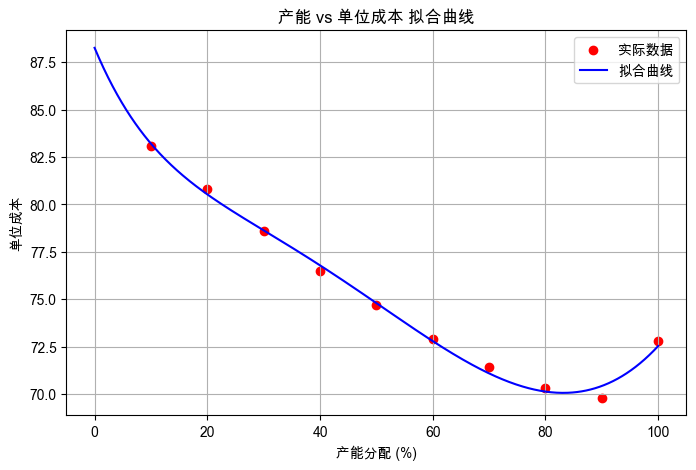

拟合参数: [ 1.03692255e-04 -1.94619118e-02  1.11441219e+00  5.17735733e+01
  3.64782305e+01]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


# 假设的产能分配数据（0%-100%）
capacity_percent = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
unit_cost = np.array([83.1,80.8,78.6,76.5,74.7,72.9,71.4,70.3,69.8,72.8])  # 90% 产能最优

# 定义 U 形曲线 + 学习曲线的拟合函数
def cost_function(x, a, b, c, d, e):
    return a*x**3 + b*x**2 + c*x + d + e * np.exp(-0.05*x)  # U形曲线 + 指数学习效应

# 拟合曲线
popt, _ = curve_fit(cost_function, capacity_percent, unit_cost)

# 生成平滑曲线
x_smooth = np.linspace(0, 100, 500)
y_smooth = cost_function(x_smooth, *popt)

# 画出拟合曲线
plt.figure(figsize=(8, 5))
plt.scatter(capacity_percent, unit_cost, color='red', label='实际数据')
plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', label='拟合曲线')
plt.xlabel('产能分配 (%)')
plt.ylabel('单位成本')
plt.title('产能 vs 单位成本 拟合曲线')
plt.legend()
plt.grid()
plt.show()

# 输出拟合方程参数
print(f"拟合参数: {popt}")

技术2

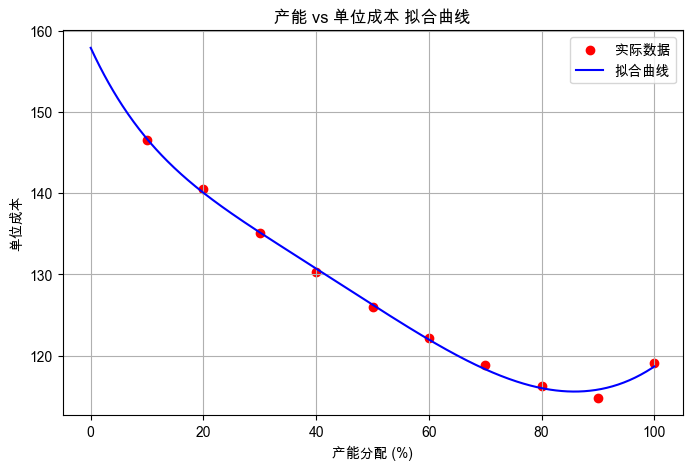

拟合参数: [ 1.67493318e-04 -3.09670407e-02  1.65709348e+00  9.47018080e+01
  6.31858169e+01]


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


# 假设的产能分配数据（0%-100%）
capacity_percent = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
unit_cost = np.array([146.5,140.5,135.1,130.3,126,122.2,118.9,116.2,114.8,119.1])  # 90% 产能最优

# 定义 U 形曲线 + 学习曲线的拟合函数
def cost_function(x, a, b, c, d, e):
    return a*x**3 + b*x**2 + c*x + d + e * np.exp(-0.05*x)  # U形曲线 + 指数学习效应

# 拟合曲线
popt, _ = curve_fit(cost_function, capacity_percent, unit_cost)

# 生成平滑曲线
x_smooth = np.linspace(0, 100, 500)
y_smooth = cost_function(x_smooth, *popt)

# 画出拟合曲线
plt.figure(figsize=(8, 5))
plt.scatter(capacity_percent, unit_cost, color='red', label='实际数据')
plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', label='拟合曲线')
plt.xlabel('产能分配 (%)')
plt.ylabel('单位成本')
plt.title('产能 vs 单位成本 拟合曲线')
plt.legend()
plt.grid()
plt.show()

# 输出拟合方程参数
print(f"拟合参数: {popt}")